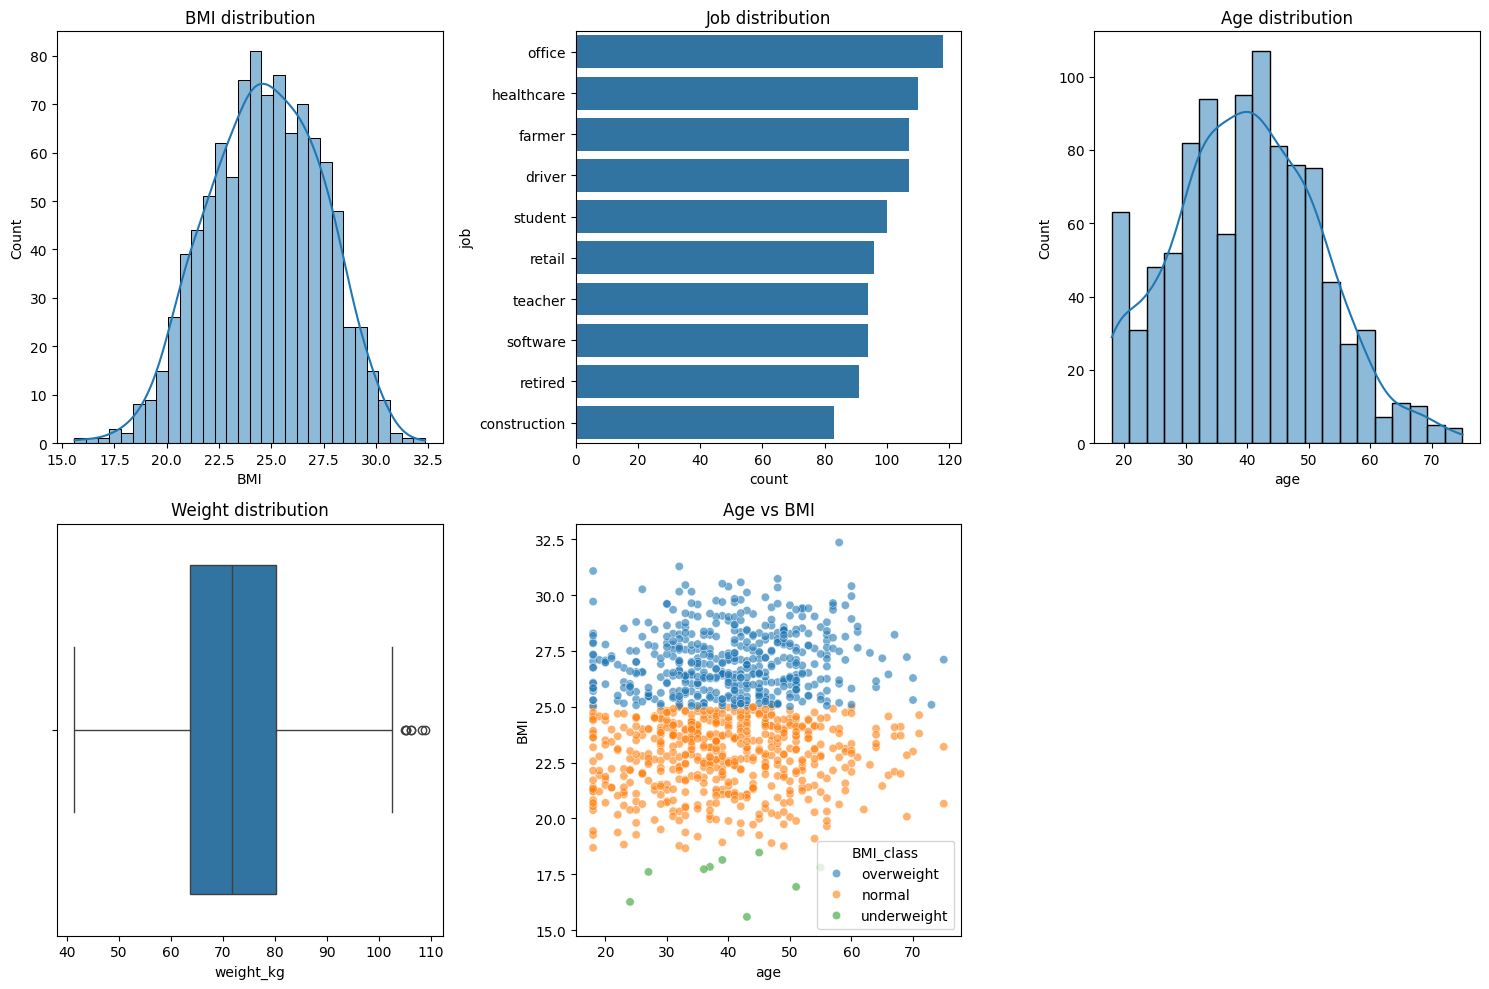


===== Basic ML Models =====

LogisticRegression Accuracy: 0.985
              precision    recall  f1-score   support

      normal       0.98      0.99      0.99       104
  overweight       0.99      1.00      0.99        94
 underweight       0.00      0.00      0.00         2

    accuracy                           0.98       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.98      0.98      0.98       200


DecisionTree Accuracy: 0.985
              precision    recall  f1-score   support

      normal       1.00      0.97      0.99       104
  overweight       0.97      1.00      0.98        94
 underweight       1.00      1.00      1.00         2

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.99       200


RandomForest Accuracy: 0.915
              precision    recall  f1-score   support

      normal       0.91      0.92      0.92       104
  ov

C:\Users\longpt1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

CNN Results:
Accuracy: 0.745
              precision    recall  f1-score   support

      normal       0.74      0.79      0.76       104
  overweight       0.75      0.71      0.73        94
 underweight       0.00      0.00      0.00         2

    accuracy                           0.74       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.74      0.74      0.74       200



C:\Users\longpt1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

RNN Results:
Accuracy: 0.94
              precision    recall  f1-score   support

      normal       0.97      0.91      0.94       104
  overweight       0.91      0.99      0.95        94
 underweight       0.00      0.00      0.00         2

    accuracy                           0.94       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.93      0.94      0.94       200



C:\Users\longpt1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

LSTM Results:
Accuracy: 0.61
              precision    recall  f1-score   support

      normal       0.58      0.88      0.70       104
  overweight       0.70      0.33      0.45        94
 underweight       0.00      0.00      0.00         2

    accuracy                           0.61       200
   macro avg       0.43      0.40      0.38       200
weighted avg       0.63      0.61      0.58       200


===== Model Evaluation Results =====
                Model  Accuracy    MAE    MSE      RMSE
0  LogisticRegression     0.985  0.025  0.045  0.212132
1        DecisionTree     0.985  0.015  0.015  0.122474
2        RandomForest     0.915  0.095  0.115  0.339116
3                 SVC     0.965  0.045  0.065  0.254951
4                 KNN     0.850  0.160  0.180  0.424264
5                 CNN     0.745  0.265  0.285  0.533854
6                 RNN     0.940  0.070  0.090  0.300000
7                LSTM     0.610  0.400  0.420  0.648074


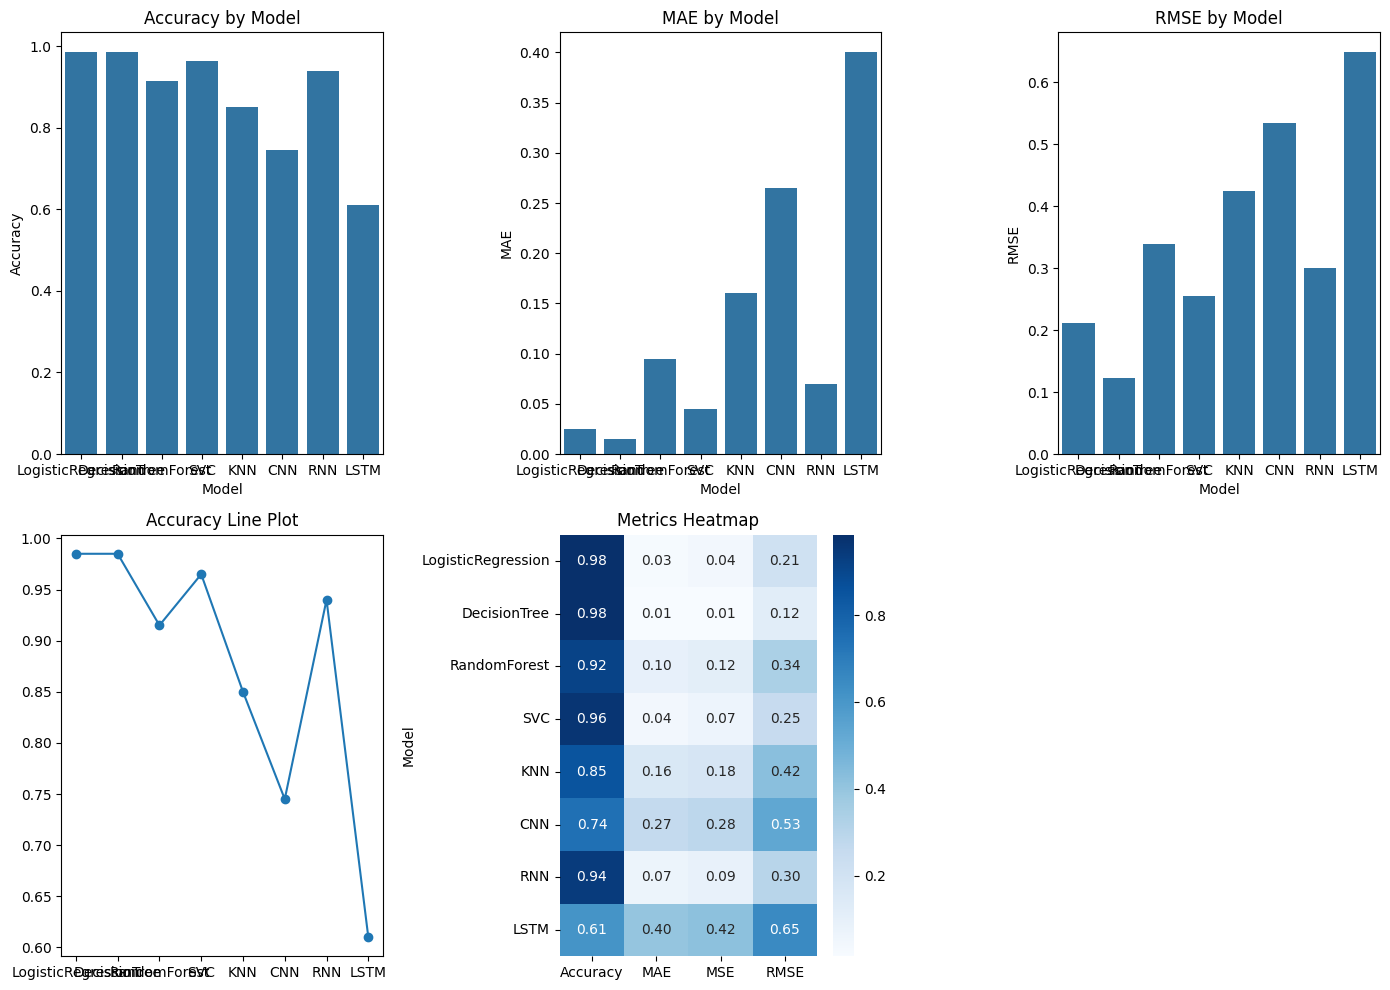


Best Model: LogisticRegression
Best model saved to C:\DATA\best_model.pkl
Health guide saved to C:\DATA\kb_healthGuide.json


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras import layers, models
import json

# --- Load dataset ---
df = pd.read_csv(r"C:\DATA\data_4.1.csv")

# --- Tính BMI & phân loại ---
df['BMI'] = df['weight_kg'] / (df['height_cm']/100)**2
def bmi_class(bmi):
    if bmi < 18.5: return 'underweight'
    elif bmi < 25: return 'normal'
    else: return 'overweight'
df['BMI_class'] = df['BMI'].apply(bmi_class)

# ======================================
# b. Visualization phân bố dữ liệu
# ======================================
plt.figure(figsize=(15,10))

# 1. Histogram BMI
plt.subplot(2,3,1)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI distribution")

# 2. Countplot nghề
plt.subplot(2,3,2)
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Job distribution")

# 3. Histogram tuổi
plt.subplot(2,3,3)
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age distribution")

# 4. Boxplot cân nặng
plt.subplot(2,3,4)
sns.boxplot(x=df['weight_kg'])
plt.title("Weight distribution")

# 5. Scatter age vs BMI
plt.subplot(2,3,5)
sns.scatterplot(x='age', y='BMI', hue='BMI_class', data=df, alpha=0.6)
plt.title("Age vs BMI")

plt.tight_layout()
plt.show()


# ======================================
# c. Train 5 basic ML models
# ======================================
X = df[['job','age','height_cm','weight_kg']]
y = df['BMI_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

categorical = ['job']
numeric = ['age','height_cm','weight_kg']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('num', StandardScaler(), numeric)
])

models_sklearn = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

trained_models = {}
print("\n===== Basic ML Models =====")
for name, model in models_sklearn.items():
    clf = Pipeline(steps=[('preprocess', preprocessor),
                          ('model', model)])
    clf.fit(X_train, y_train)
    trained_models[name] = clf
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, zero_division=0))


# ======================================
# d. CNN, RNN, LSTM (5 layers)
# ======================================
cat = OneHotEncoder(sparse_output=False)
jobs_enc = cat.fit_transform(X[['job']])
scaler = StandardScaler()
nums = scaler.fit_transform(X[['age','height_cm','weight_kg']])
X_enc = np.hstack([jobs_enc, nums])

le = LabelEncoder()
y_num = le.fit_transform(y)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_enc, y_num, test_size=0.2, random_state=42, stratify=y_num)

X_train_nn = X_train_nn.reshape(X_train_nn.shape[0], X_train_nn.shape[1], 1)
X_test_nn  = X_test_nn.reshape(X_test_nn.shape[0],  X_test_nn.shape[1], 1)

def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, 2, activation='relu', input_shape=input_shape),
        layers.Conv1D(64, 2, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_rnn(input_shape):
    model = models.Sequential([
        layers.SimpleRNN(64, return_sequences=True, input_shape=input_shape),
        layers.SimpleRNN(32),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm(input_shape):
    model = models.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=input_shape),
        layers.LSTM(32),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("\n===== Deep Learning Models =====")

# CNN
cnn = build_cnn((X_train_nn.shape[1],1))
cnn.fit(X_train_nn, y_train_nn, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
y_pred_cnn = np.argmax(cnn.predict(X_test_nn), axis=1)
print("\nCNN Results:")
print("Accuracy:", accuracy_score(y_test_nn, y_pred_cnn))
print(classification_report(le.inverse_transform(y_test_nn),
                            le.inverse_transform(y_pred_cnn), zero_division=0))

# RNN
rnn = build_rnn((X_train_nn.shape[1],1))
rnn.fit(X_train_nn, y_train_nn, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
y_pred_rnn = np.argmax(rnn.predict(X_test_nn), axis=1)
print("\nRNN Results:")
print("Accuracy:", accuracy_score(y_test_nn, y_pred_rnn))
print(classification_report(le.inverse_transform(y_test_nn),
                            le.inverse_transform(y_pred_rnn), zero_division=0))

# LSTM
lstm = build_lstm((X_train_nn.shape[1],1))
lstm.fit(X_train_nn, y_train_nn, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
y_pred_lstm = np.argmax(lstm.predict(X_test_nn), axis=1)
print("\nLSTM Results:")
print("Accuracy:", accuracy_score(y_test_nn, y_pred_lstm))
print(classification_report(le.inverse_transform(y_test_nn),
                            le.inverse_transform(y_pred_lstm), zero_division=0))


# ======================================
# e. Compare & Evaluate
# ======================================
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(le.transform(y_test), le.transform(y_pred))
    mse = mean_squared_error(le.transform(y_test), le.transform(y_pred))
    rmse = np.sqrt(mse)
    results.append([name, acc, mae, mse, rmse])

# CNN
results.append(["CNN",
                accuracy_score(y_test_nn, y_pred_cnn),
                mean_absolute_error(y_test_nn, y_pred_cnn),
                mean_squared_error(y_test_nn, y_pred_cnn),
                np.sqrt(mean_squared_error(y_test_nn, y_pred_cnn))])

# RNN
results.append(["RNN",
                accuracy_score(y_test_nn, y_pred_rnn),
                mean_absolute_error(y_test_nn, y_pred_rnn),
                mean_squared_error(y_test_nn, y_pred_rnn),
                np.sqrt(mean_squared_error(y_test_nn, y_pred_rnn))])

# LSTM
results.append(["LSTM",
                accuracy_score(y_test_nn, y_pred_lstm),
                mean_absolute_error(y_test_nn, y_pred_lstm),
                mean_squared_error(y_test_nn, y_pred_lstm),
                np.sqrt(mean_squared_error(y_test_nn, y_pred_lstm))])

df_results = pd.DataFrame(results, columns=['Model','Accuracy','MAE','MSE','RMSE'])
print("\n===== Model Evaluation Results =====")
print(df_results)

# ======================================
# f. Visualization (>=5 loại)
# ======================================
plt.figure(figsize=(14,10))

# 1. Bar Accuracy
plt.subplot(2,3,1)
sns.barplot(x='Model', y='Accuracy', data=df_results)
plt.title("Accuracy by Model")

# 2. Bar MAE
plt.subplot(2,3,2)
sns.barplot(x='Model', y='MAE', data=df_results)
plt.title("MAE by Model")

# 3. Bar RMSE
plt.subplot(2,3,3)
sns.barplot(x='Model', y='RMSE', data=df_results)
plt.title("RMSE by Model")

# 4. Line plot Accuracy
plt.subplot(2,3,4)
plt.plot(df_results['Model'], df_results['Accuracy'], marker='o')
plt.title("Accuracy Line Plot")

# 5. Heatmap metrics
plt.subplot(2,3,5)
sns.heatmap(df_results.set_index('Model')[['Accuracy','MAE','MSE','RMSE']], annot=True, fmt=".2f", cmap="Blues")
plt.title("Metrics Heatmap")

plt.tight_layout()
plt.show()

# ======================================
# g. Lưu best model để deploy
# ======================================
import joblib

# Chọn best model theo Accuracy
best_model_row = df_results.sort_values(by="Accuracy", ascending=False).iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest Model: {best_model_name}")

if best_model_name in trained_models:
    # 👉 Sklearn model
    best_model = trained_models[best_model_name]
    joblib.dump(best_model, r"C:\DATA\best_model.pkl")
    print("Best model saved to C:\\DATA\\best_model.pkl")
else:
    # 👉 Deep learning model (CNN/RNN/LSTM)
    if best_model_name == "CNN":
        best_model = cnn
    elif best_model_name == "RNN":
        best_model = rnn
    else:
        best_model = lstm
    best_model.save(r"C:\DATA\best_model.h5")
    print("Best model saved to C:\\DATA\\best_model.h5")

# Knowledge base JSON
kb = {
    "underweight": "Bạn đang thiếu cân. Hãy bổ sung dinh dưỡng giàu protein, tập luyện thể lực đều đặn.",
    "normal": "Cân nặng của bạn bình thường. Hãy duy trì chế độ ăn uống cân bằng và lối sống lành mạnh.",
    "overweight": "Bạn đang thừa cân. Hãy tăng cường vận động, giảm tinh bột, hạn chế đồ ngọt và chất béo."
}
with open(r"C:\DATA\kb_healthGuide.json", "w", encoding="utf-8") as f:
    json.dump(kb, f, ensure_ascii=False, indent=4)
print("Health guide saved to C:\\DATA\\kb_healthGuide.json")

